In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("survey_results_public.csv")

In [2]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [3]:
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [4]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
Country         34756 non-null object
EdLevel         34188 non-null object
YearsCodePro    34621 non-null object
Employment      34717 non-null object
Salary          34756 non-null float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB


In [6]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [7]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
Country         30019 non-null object
EdLevel         30019 non-null object
YearsCodePro    30019 non-null object
Salary          30019 non-null float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [8]:
df['Country'].value_counts()

United States                       7569
India                               2425
United Kingdom                      2287
Germany                             1903
Canada                              1178
Brazil                               991
France                               972
Spain                                670
Australia                            659
Netherlands                          654
Poland                               566
Italy                                560
Russian Federation                   522
Sweden                               514
Turkey                               327
Israel                               300
Pakistan                             271
Switzerland                          266
Mexico                               256
Ireland                              253
Norway                               252
Ukraine                              249
Romania                              246
South Africa                         244
Czech Republic  

In [9]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [10]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

C:\Users\gowtham.veepujerla\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


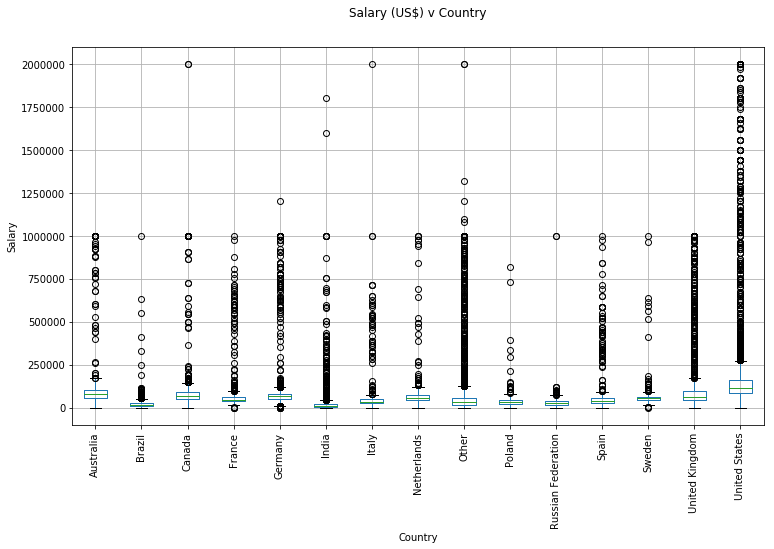

In [11]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [12]:
df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df['Country'] != 'Other']

C:\Users\gowtham.veepujerla\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


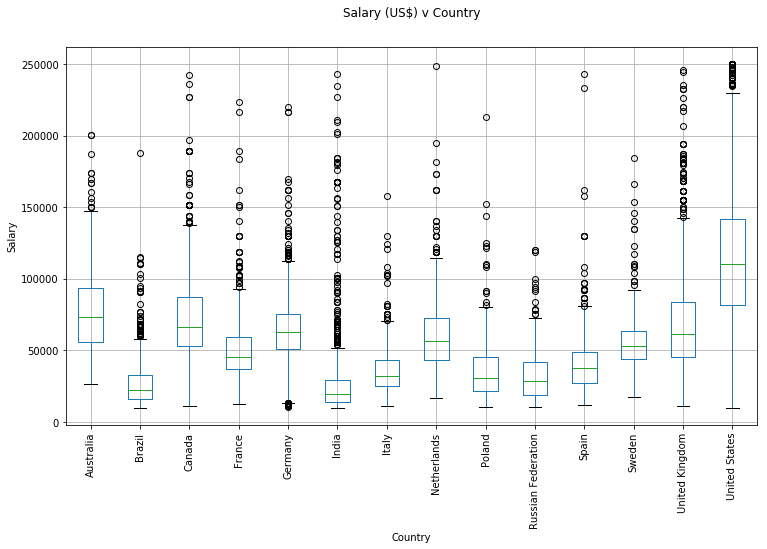

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [14]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [15]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [16]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [17]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [18]:
df["EdLevel"].unique()

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [19]:
'''from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df['EdLevel'] = le_education.fit_transform(df['EdLevel'])
df["EdLevel"].unique()
#le.classes_'''

'from sklearn.preprocessing import LabelEncoder\nle_education = LabelEncoder()\ndf[\'EdLevel\'] = le_education.fit_transform(df[\'EdLevel\'])\ndf["EdLevel"].unique()\n#le.classes_'

In [20]:
import pandas as pd

# Assuming df is your DataFrame and 'EdLevel' is the column you want to encode
df['EdLevel'] = df['EdLevel'].astype('category')
df['EdLevel'] = df['EdLevel'].cat.codes

# Print the unique encoded values
unique_encoded_values = df["EdLevel"].unique()
print("Encoded Values:", unique_encoded_values)

Encoded Values: [0 2 1 3]


In [21]:
'''le_country = LabelEncoder()
df['Country'] = le_country.fit_transform(df['Country'])
df["Country"].unique()'''

'le_country = LabelEncoder()\ndf[\'Country\'] = le_country.fit_transform(df[\'Country\'])\ndf["Country"].unique()'

In [22]:
import pandas as pd

# Assuming df is your DataFrame and 'Country' is the column you want to encode
df['Country'] = pd.Categorical(df['Country'])
df['Country'] = df['Country'].cat.codes

# Print the unique encoded values
unique_encoded_values = df["Country"].unique()
print("Encoded Values:", unique_encoded_values)

Encoded Values: [13 12 10  7  4  2  6  1  3  5 11  8  0  9]


In [23]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

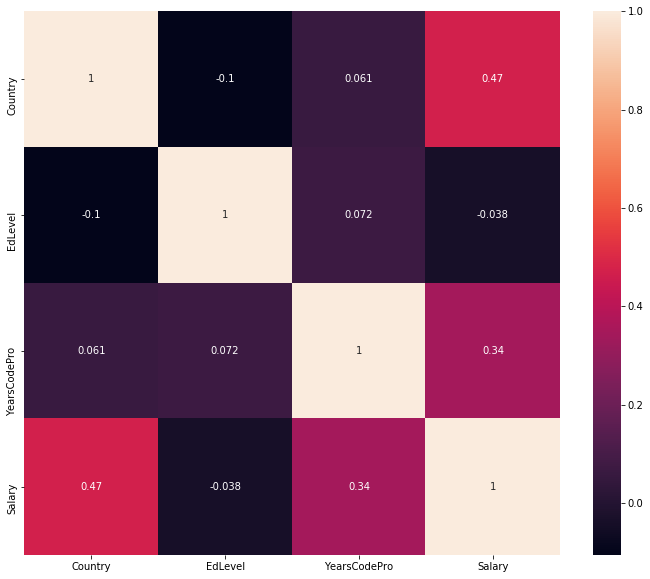

In [24]:
## Check for multicollinearity
import seaborn as sns

plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [25]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
X_train_scaled=scaler.fit_transform(X_train)

In [28]:
X_test_scaled=scaler.transform(X_test)

In [29]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [30]:
X_train_scaled

array([[ 0.52435263,  0.13041442,  1.42522176],
       [-1.88873388, -0.89819855,  2.98652861],
       [-1.23061938,  1.1590274 , -0.3963029 ],
       ...,
       [ 0.96309564,  0.13041442,  0.12413272],
       [ 0.96309564, -0.89819855, -0.5264118 ],
       [-1.66936238, -0.89819855, -0.91673851]])

In [31]:
X_test_scaled

array([[-0.57250487,  1.1590274 , -0.5264118 ],
       [-1.44999088, -0.89819855, -1.11190187],
       [-0.35313337,  1.1590274 , -0.91673851],
       ...,
       [-1.66936238, -0.89819855, -0.3963029 ],
       [ 0.96309564, -0.89819855,  0.12413272],
       [-1.88873388, -0.89819855,  0.51445943]])

## Box Plots To understand Effect Of Standard Scaler

Text(0.5,1,'X_train After Scaling')

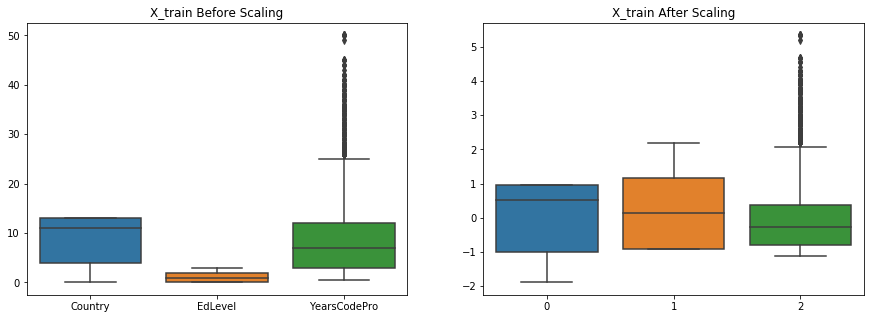

In [32]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Model Training

In [33]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
## print the coefficients and the intercept
print(linear_reg.coef_)

[21539.41838454  -824.95188733 15095.61049974]


In [35]:
print(linear_reg.intercept_)

77105.35316387237


In [36]:
## on which parameters the model has been trained
linear_reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [37]:
y_pred = linear_reg.predict(X_test_scaled)

In [38]:
from sklearn.metrics import r2_score
linear_score=r2_score(y_test,y_pred)
print(linear_score)

0.3282351223249278


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y_test, y_pred))

In [40]:
error

38724.45058660155

In [41]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X_train_scaled,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [42]:
y_pred = dec_tree_reg.predict(X_test_scaled)

In [43]:
Dec_tree_score=r2_score(y_test,y_pred)
print(Dec_tree_score)

0.5421616624262359


In [44]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$31,969.27


In [45]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=0)
random_forest_reg.fit(X_train_scaled,y_train)

C:\Users\gowtham.veepujerla\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [46]:
y_pred = random_forest_reg.predict(X_test_scaled)

In [47]:
random_forest_score=r2_score(y_test,y_pred)
print(random_forest_score)

0.5490804709626259


In [48]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$31,726.79


In [49]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train_scaled,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [50]:
'''regressor = gs.best_estimator_

regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))'''

'regressor = gs.best_estimator_\n\nregressor.fit(X_train_scaled,y_train)\ny_pred = regressor.predict(X_test_scaled)\nerror = np.sqrt(mean_squared_error(y_test, y_pred))\nprint("${:,.02f}".format(error))'

In [51]:
regressor = linear_reg

regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

$38,724.45


In [52]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.3282351223249278


In [53]:
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
13,13,1,1.0
16,13,0,3.0
18,13,0,3.0
23,4,3,20.0
25,2,0,10.0


In [54]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 15 ]])
X

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [55]:
'''X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X'''

'X[:, 0] = le_country.transform(X[:,0])\nX[:, 1] = le_education.transform(X[:,1])\nX = X.astype(float)\nX'

In [56]:
import pandas as pd

# Assuming X is your feature matrix
country_mapping = {country: i for i, country in enumerate(np.unique(X[:, 0]))}
education_mapping = {education: i for i, education in enumerate(np.unique(X[:, 1]))}

# Apply the mapping to the respective columns
X[:, 0] = np.vectorize(country_mapping.get)(X[:, 0])
X[:, 1] = np.vectorize(education_mapping.get)(X[:, 1])

# Convert the entire matrix to float
X = X.astype(float)

# Print the modified feature matrix
print(X)


[[ 0.  0. 15.]]


In [57]:
y_pred = regressor.predict(X)
y_pred

array([303539.51066001])

## Pickling The Model file For Deployment

In [58]:
import pickle

In [59]:
data = {"model": regressor, "country_mapping": country_mapping, "education_mapping": education_mapping}
with open('regmodel.pkl', 'wb') as file:
    pickle.dump(data, file)

In [60]:
with open('regmodel.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
country_mapping = data["country_mapping"]
education_mapping = data["education_mapping"]

In [61]:
y_pred = regressor_loaded.predict(X)
y_pred

array([303539.51066001])